# Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

# Data Preparation

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df.shape

(21613, 21)

In [4]:
df.info()
# date column type is object it should be datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Data almost has no missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
# Drop missing values (2 values from sqft_above)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df.date[0][:4] # taking first 4 characters of date columns as a year

'2014'

In [10]:
date = [i[:4] for i in df.date]

In [11]:
df['date'] = date

In [12]:
df.head(2)

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  2014  221900.0         3       1.00         1180      5650   
1  6414100192  2014  538000.0         3       2.25         2570      7242   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7      1180.0              0      1955   
1     2.0           0     0  ...      7      2170.0            400      1951   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  

[2 rows x 21 columns]

In [13]:
df.waterfront.value_counts()

0    21448
1      163
Name: waterfront, dtype: int64

In [14]:
df.floors.value_counts()  
#checked this column because it is 'float' and decided not change the type according to the values in column

1.0    10679
2.0     8241
1.5     1909
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [15]:
df.view.value_counts()

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [16]:
df.yr_renovated.value_counts(),print('yr_renovated column has :',df.yr_renovated.nunique(),'unique values')
#according to the values in columns most of the houses haven't been renovated since it built. 

yr_renovated column has : 70 unique values


(0       20697
 2014       91
 2013       37
 2003       36
 2005       35
         ...  
 1951        1
 1959        1
 1948        1
 1954        1
 1944        1
 Name: yr_renovated, Length: 70, dtype: int64,
 None)

In [17]:
yr_renovated = []
for i in range(len(df)):
    if df.yr_renovated[i] > 0:
        yr_renovated.append(df.yr_renovated[i])
    else:
        yr_renovated.append(df.yr_built[i])  
        
# I am planning to change the 0 values in yr_renovated colum to the year house built 

In [18]:
df['yr_renovated'] = yr_renovated

In [19]:
df.yr_renovated.value_counts()  # there are no 0 values in this column

2014    650
2005    485
2006    478
2004    459
2003    457
       ... 
1901     28
1902     25
1933     23
1935     19
1934     14
Name: yr_renovated, Length: 116, dtype: int64

In [20]:
df.date.max(),df.date.min()  #data contains the information from these years

('2015', '2014')

In [21]:
age = [2015 - df.yr_built[i] for i in range(len(df))]

In [22]:
age[4]

28

In [23]:
df.head()

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  2014  221900.0         3       1.00         1180      5650   
1  6414100192  2014  538000.0         3       2.25         2570      7242   
2  5631500400  2015  180000.0         2       1.00          770     10000   
3  2487200875  2014  604000.0         4       3.00         1960      5000   
4  1954400510  2015  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7      1180.0              0      1955   
1     2.0           0     0  ...      7      2170.0            400      1951   
2     1.0           0     0  ...      6       770.0              0      1933   
3     1.0           0     0  ...      7      1050.0            910      1965   
4     1.0           0     0  ...      8      1680.0              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1955    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2          1933    98028  47.7379 -122.233           2720        8062  
3          1965    98136  47.5208 -122.393           1360        5000  
4          1987    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [24]:
df['Age'] = age

In [25]:
df['Age_aft_ren'] = 2015-df['yr_renovated']

In [26]:
df.head()

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  2014  221900.0         3       1.00         1180      5650   
1  6414100192  2014  538000.0         3       2.25         2570      7242   
2  5631500400  2015  180000.0         2       1.00          770     10000   
3  2487200875  2014  604000.0         4       3.00         1960      5000   
4  1954400510  2015  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_basement  yr_built  yr_renovated  \
0     1.0           0     0  ...              0      1955          1955   
1     2.0           0     0  ...            400      1951          1991   
2     1.0           0     0  ...              0      1933          1933   
3     1.0           0     0  ...            910      1965          1965   
4     1.0           0     0  ...              0      1987          1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
0    98178  47.5112 -122.257           1340        5650   60           60  
1    98125  47.7210 -122.319           1690        7639   64           24  
2    98028  47.7379 -122.233           2720        8062   82           82  
3    98136  47.5208 -122.393           1360        5000   50           50  
4    98074  47.6168 -122.045           1800        7503   28           28  

[5 rows x 23 columns]

In [27]:
df.drop(columns=['id','yr_built','yr_renovated','date'],inplace= True)

In [28]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7      1180.0              0    98178  47.5112   
1     0          3      7      2170.0            400    98125  47.7210   
2     0          3      6       770.0              0    98028  47.7379   
3     0          5      7      1050.0            910    98136  47.5208   
4     0          3      8      1680.0              0    98074  47.6168   

      long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
0 -122.257           1340        5650   60           60  
1 -122.319           1690        7639   64           24  
2 -122.233           2720        8062   82           82  
3 -122.393           1360        5000   50           50  
4 -122.045           1800        7503   28           28

In [29]:
df.grade.value_counts()

7     8980
8     6067
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [30]:
df.bedrooms.value_counts() # there are 0 bedrooms lets check it

3     9823
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [31]:
df[df.bedrooms < 1] # As we can see there is a problem with bedrooms numbers. some houses dont have a bedroom but have bathroom?
#I decided to drop those rows

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
873    1095000.0         0       0.00         3064      4764     3.5   
3117    380000.0         0       0.00         1470       979     3.0   
3465    288000.0         0       1.50         1430      1650     3.0   
4866    228000.0         0       1.00          390      5900     1.0   
6992   1295650.0         0       0.00         4810     28008     2.0   
8475    339950.0         0       2.50         2290      8319     2.0   
8482    240000.0         0       2.50         1810      5669     2.0   
9771    355000.0         0       0.00         2460      8049     2.0   
9852    235000.0         0       0.00         1470      4800     2.0   
12651   320000.0         0       2.50         1490      7111     2.0   
14421   139950.0         0       0.00          844      4269     1.0   
18377   265000.0         0       0.75          384    213444     1.0   
19450   142000.0         0       0.00          290     20875     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
873             0     2          3      7      3064.0              0    98102   
3117            0     2          3      8      1470.0              0    98133   
3465            0     0          3      7      1430.0              0    98125   
4866            0     0          2      4       390.0              0    98118   
6992            0     0          3     12      4810.0              0    98053   
8475            0     0          3      8      2290.0              0    98042   
8482            0     0          3      7      1810.0              0    98038   
9771            0     0          3      8      2460.0              0    98031   
9852            0     0          3      7      1470.0              0    98065   
12651           0     0          3      7      1490.0              0    98065   
14421           0     0          4      7       844.0              0    98001   
18377           0     0          3      4       384.0              0    98070   
19450           0     0          1      1       290.0              0    98024   

           lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
873    47.6362 -122.322           2360        4000   25           25  
3117   47.7145 -122.356           1470        1399    9            9  
3465   47.7222 -122.290           1430        1650   16           16  
4866   47.5260 -122.261           2170        6000   62           62  
6992   47.6642 -122.069           4740       35061   25           25  
8475   47.3473 -122.151           2500        8751   30           30  
8482   47.3493 -122.053           1810        5685   12           12  
9771   47.4095 -122.168           2520        8050   25           25  
9852   47.5265 -121.828           1060        7200   19           19  
12651  47.5261 -121.826           1500        4675   16           16  
14421  47.2781 -122.250           1380        9600  102          102  
18377  47.4177 -122.491           1920      224341   12           12  
19450  47.5308 -121.888           1620       22850   52           52

In [32]:
df.drop(df[df['bedrooms'] < 1].index, inplace=True)

In [33]:
df[df.bathrooms == 0 ] #this could be normal

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1147    75000.0         1        0.0          670     43377     1.0   
5830   280000.0         1        0.0          600     24501     1.0   
10479  484000.0         1        0.0          690     23244     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
1147            0     0          3      3       670.0              0    98022   
5830            0     0          2      3       600.0              0    98045   
10479           0     0          4      7       690.0              0    98053   

           lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
1147   47.2638 -121.906           1160       42882   49           49  
5830   47.5316 -121.749            990       22549   65           65  
10479  47.6429 -121.955           1690       19290   67           67

In [34]:
df[df['price'] <76000] #seems normal

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1147  75000.0         1        0.0          670     43377     1.0           0   

      view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
1147     0          3      3       670.0              0    98022  47.2638   

         long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
1147 -121.906           1160       42882   49           49

In [35]:
df[df.sqft_living < 400] #normal

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
858    245000.0         1       0.75          380     15000     1.0   
15379  276000.0         1       0.75          370      1801     1.0   
21330  245000.0         1       1.00          390      2000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
858             0     0          3      5       380.0              0    98168   
15379           0     0          5      5       370.0              0    98117   
21330           0     0          4      6       390.0              0    98103   

           lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
858    47.4810 -122.323           1170       15000   52           52  
15379  47.6778 -122.389           1340        5000   92           92  
21330  47.6938 -122.347           1340        5100   95           95

In [36]:
df.waterfront.value_counts()

0    21435
1      163
Name: waterfront, dtype: int64

In [37]:
df.zipcode.value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df.sqft_basement.max(),df.sqft_basement.min()

(4820, 0)

In [39]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159800e+04  21598.000000  21598.000000  21598.000000  2.159800e+04   
mean   5.401636e+05      3.372859      2.115566   2080.077368  1.510228e+04   
std    3.671422e+05      0.926686      0.769329    918.177964  4.141213e+04   
min    7.500000e+04      1.000000      0.000000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1427.750000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068875e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21598.000000  21598.000000  21598.000000  21598.000000  21598.000000   
mean       1.494050      0.007547      0.234281      3.409760      7.657468   
std        0.539691      0.086547      0.766374      0.650601      1.174026   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement       zipcode           lat          long  \
count  21598.000000   21598.000000  21598.000000  21598.000000  21598.000000   
mean    1788.444578     291.632790  98077.948699     47.560075   -122.213932   
std      827.847706     442.562709     53.511477      0.138562      0.140779   
min      370.000000       0.000000  98001.000000     47.155900   -122.519000   
25%     1190.000000       0.000000  98033.000000     47.471100   -122.328000   
50%     1560.000000       0.000000  98065.000000     47.571800   -122.230500   
75%     2210.000000     560.000000  98118.000000     47.678000   -122.125000   
max     9410.000000    4820.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15           Age   Age_aft_ren  
count   21598.000000   21598.000000  21598.000000  21598.000000  
mean     1986.529262   12761.003102     43.999768     41.617233  
std       685.267740   27274.625015     29.372926     28.806299  
min       399.000000     651.000000      0.000000      0.000000  
25%      1490.000000    5100.000000     18.000000     16.000000  
50%      1840.000000    7620.000000     40.000000     38.000000  
75%      2360.000000   10083.750000     64.000000     61.000000  
max      6210.000000  871200.000000    115.000000    115.000000

In [40]:
df[df['sqft_living15']>6000]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
10371  2983000.0         5        5.5         7400     18898     2.0   
19856  2700000.0         4        4.0         7850     89651     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
10371           0     3          3     13      6290.0           1110    98006   
19856           0     0          3     12      7850.0              0    98027   

           lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
10371  47.5431 -122.112           6110       26442   14           14  
19856  47.5406 -121.982           6210       95832    9            9

In [41]:
df[df['sqft_lot15']>800000]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
9712    937500.0         4        4.0         5545    871200     2.0   
20450  1600000.0         4        5.5         6530    871200     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
9712            0     0          3     11      3605.0           1940    98014   
20450           0     2          3     11      6530.0              0    98014   

          lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
9712   47.676 -121.882           3420      871200   12           12  
20450  47.664 -121.878           1280      858132    7            7

In [42]:
df[df['bedrooms']>9]  #one of the house has 33 bedrooms? Price and sqft does not make sense

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8755    520000.0        11       3.00         3000      4960     2.0   
13312  1148000.0        10       5.25         4590     10920     1.0   
15159   650000.0        10       2.00         3610     11914     2.0   
15868   640000.0        33       1.75         1620      6000     1.0   
19252   660000.0        10       3.00         2920      3745     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
8755            0     0          3      7      2400.0            600    98106   
13312           0     2          3      9      2500.0           2090    98004   
15159           0     0          4      7      3010.0            600    98006   
15868           0     0          5      7      1040.0            580    98103   
19252           0     0          4      7      1860.0           1060    98105   

           lat     long  sqft_living15  sqft_lot15  Age  Age_aft_ren  
8755   47.5560 -122.363           1420        4960   97           16  
13312  47.5861 -122.113           2730       10400    7            7  
15159  47.5705 -122.175           2040       11914   57           57  
15868  47.6878 -122.331           1330        4700   68           68  
19252  47.6635 -122.320           1810        3745  102          102

In [43]:
df.bedrooms.value_counts(normalize=True)*100

3     45.481063
4     31.859431
2     12.778961
5      7.412723
6      1.259376
1      0.921382
7      0.175942
8      0.060191
9      0.027780
10     0.013890
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64

In [44]:
df['bedrooms'] = [i if i <7 else 7 for i in df.bedrooms]

In [45]:
df.bedrooms.value_counts(normalize=True)*100

3    45.481063
4    31.859431
2    12.778961
5     7.412723
6     1.259376
1     0.921382
7     0.287064
Name: bedrooms, dtype: float64

# Explanatory Data Analysis

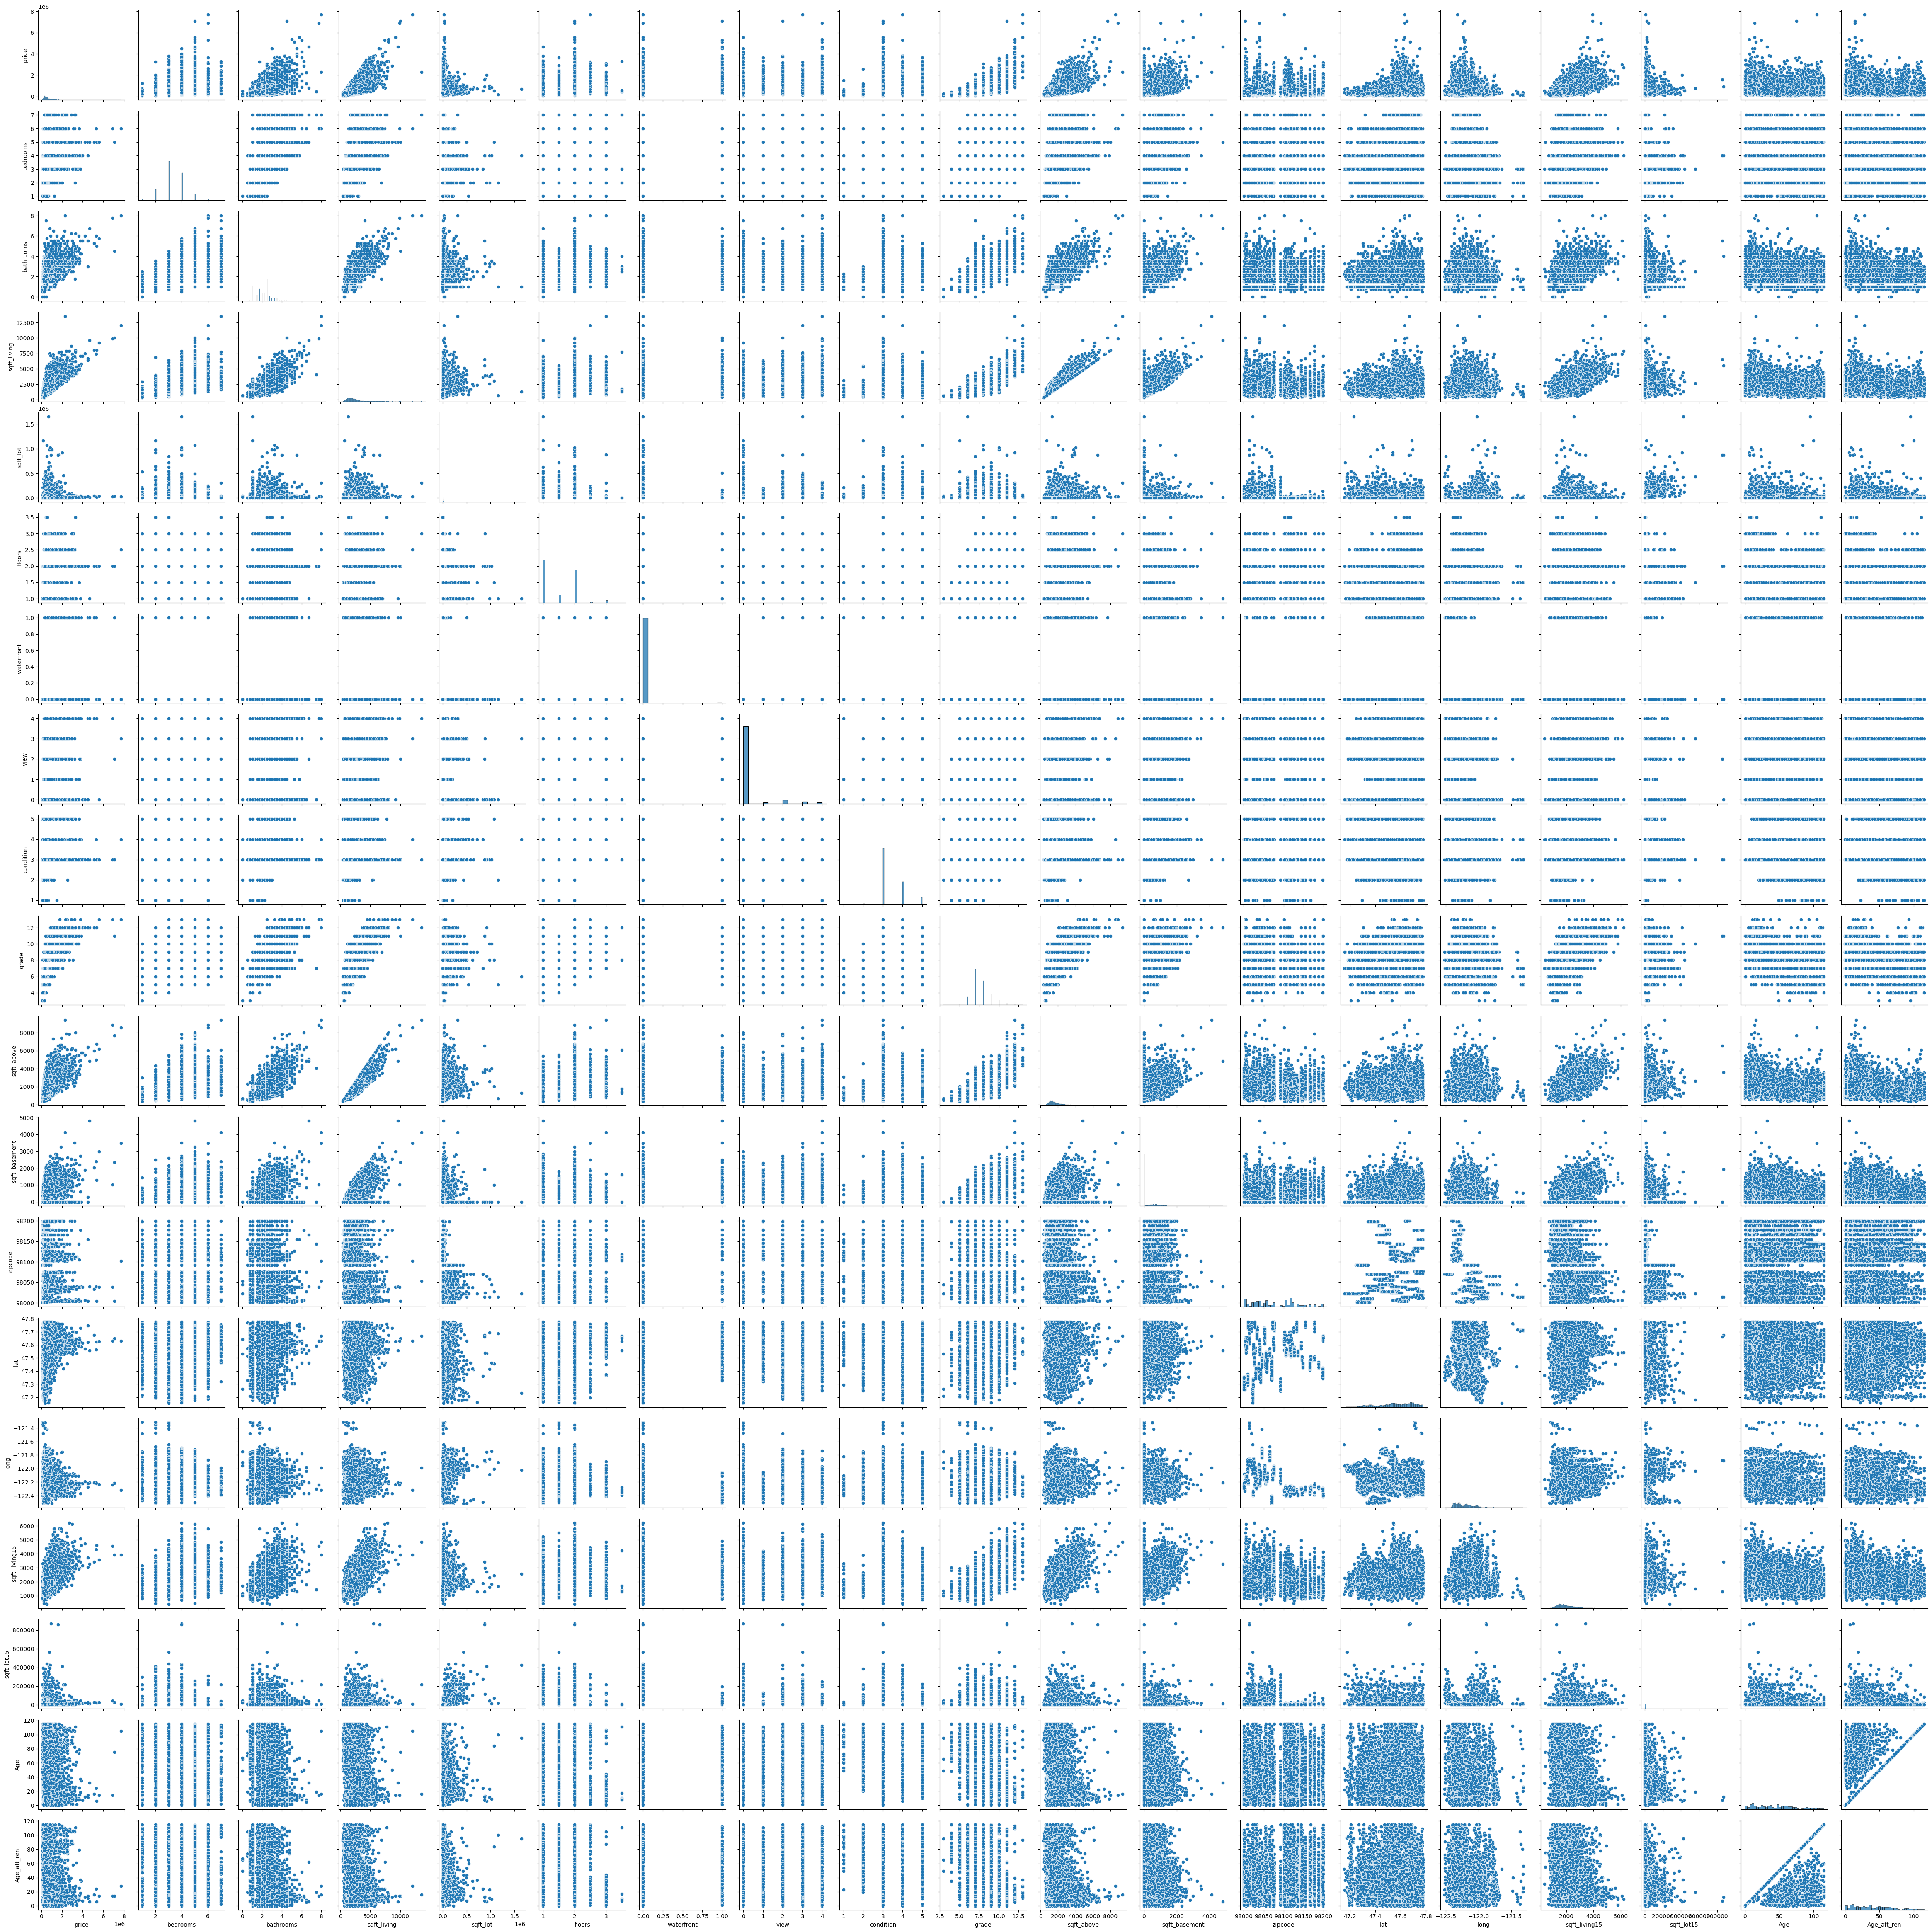

In [46]:
sns.pairplot(df);

In [47]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'Age', 'Age_aft_ren'],
      dtype='object')

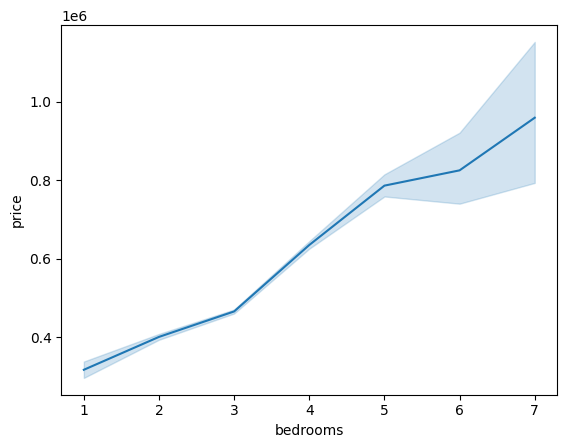

In [48]:
sns.lineplot(x='bedrooms',y='price',data=df);

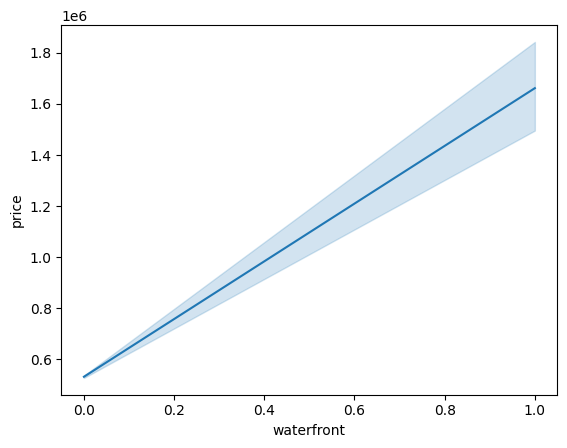

In [49]:
sns.lineplot(x='waterfront',y='price',data=df);

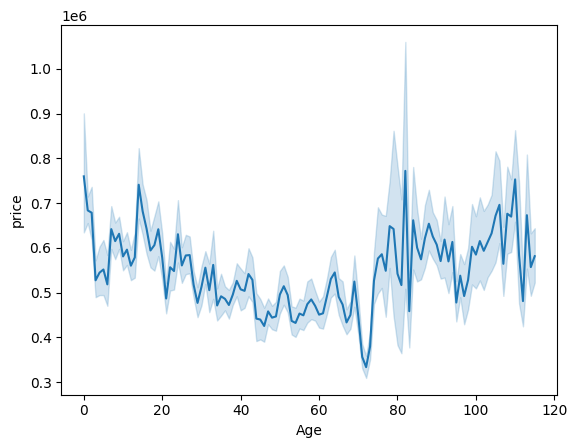

In [50]:
sns.lineplot(x='Age',y='price',data=df);

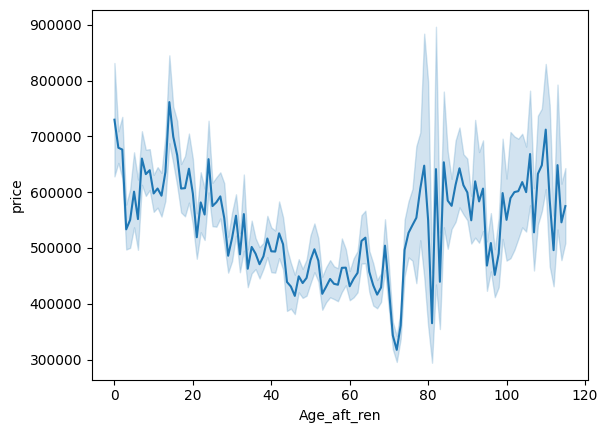

In [51]:
sns.lineplot(x='Age_aft_ren',y='price',data=df);

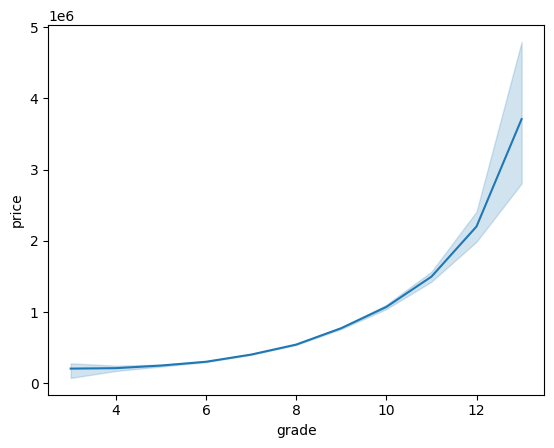

In [52]:
sns.lineplot(x='grade',y='price',data=df);

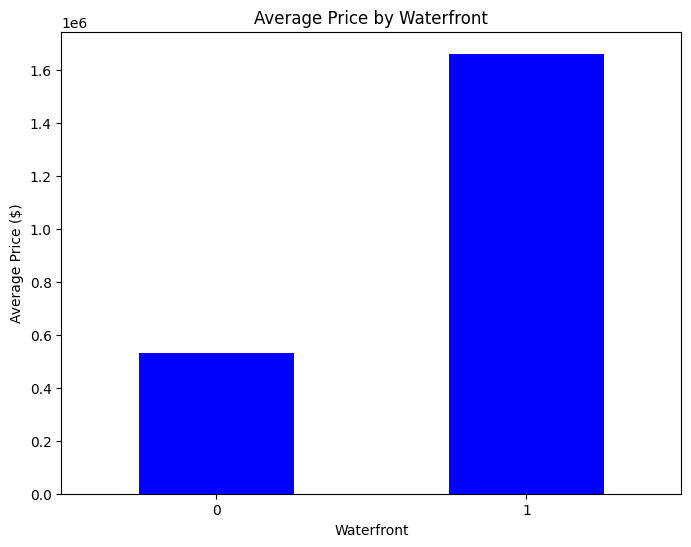

In [53]:
avg_price_by_waterfront = df.groupby('waterfront')['price'].mean()
plt.figure(figsize=(8, 6))
avg_price_by_waterfront.plot(kind='bar', color='blue')
plt.xlabel('Waterfront')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Waterfront')
plt.xticks(rotation=0)
plt.show()

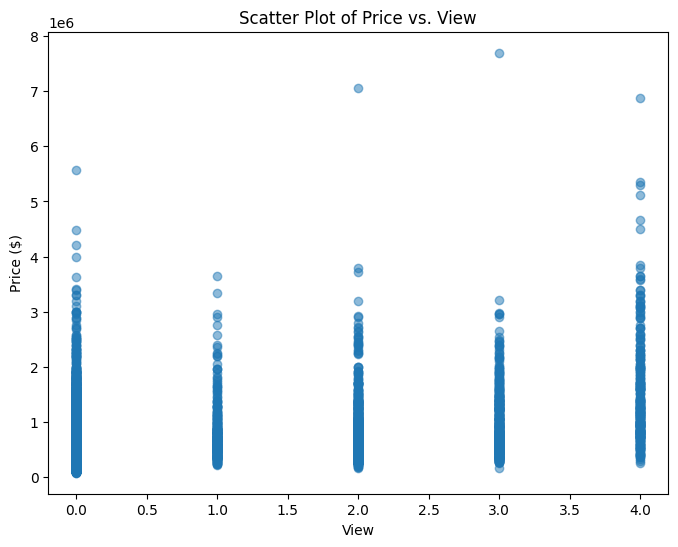

In [54]:
# Create a scatter plot of price vs. view
plt.figure(figsize=(8, 6))
plt.scatter(df['view'], df['price'], alpha=0.5)
plt.xlabel('View')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs. View')
plt.show()

# Correlation Matrix

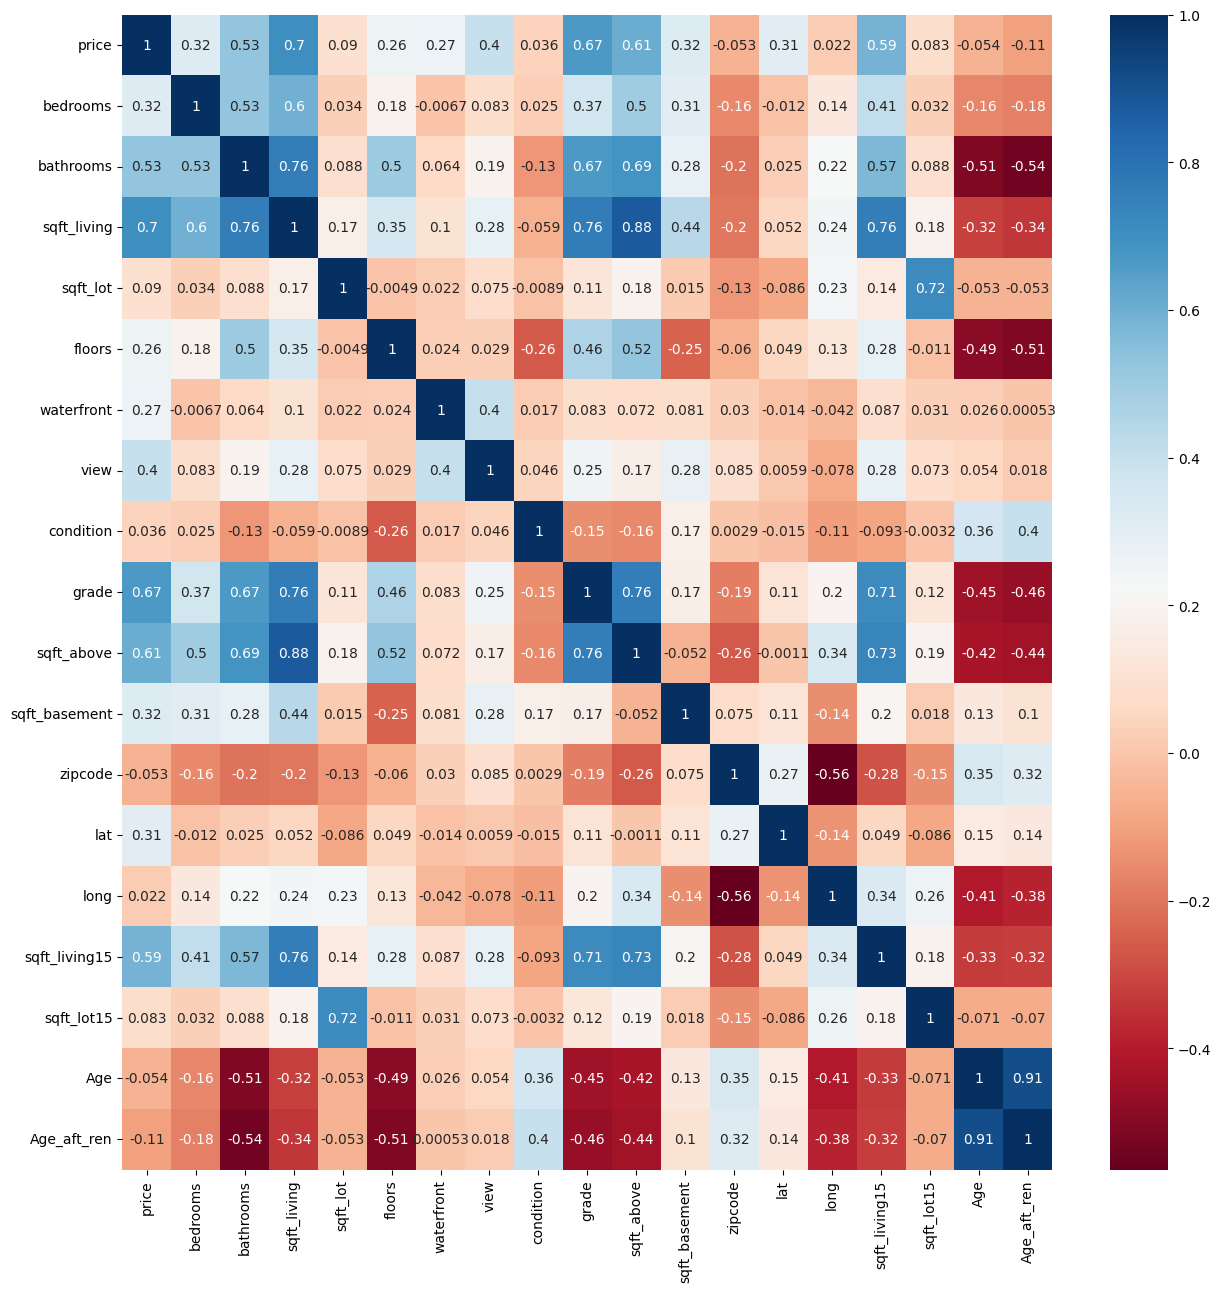

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',);

In [ ]:
for i in 

In [58]:
df.columns[0]

'price'

In [61]:
corr_features = []

for i , c in df.corr().iterrows():
    k=0
    for j in range(len(c)):
        if i!= c.index[k]:
            if c.values[k] > 0.4:
                corr_features.append([i,c.index[k],c.values[k]])
            k += 1
corr_features

[['bathrooms', 'price', 0.5258863070226744],
 ['bathrooms', 'bedrooms', 0.5294029828239427],
 ['sqft_living', 'price', 0.7019308837930661],
 ['sqft_living', 'bedrooms', 0.5957642583295246],
 ['sqft_living', 'bathrooms', 0.7558463636846541],
 ['floors', 'bathrooms', 0.5026974291945656],
 ['view', 'waterfront', 0.40197103002800255],
 ['grade', 'price', 0.6677641614573457],
 ['grade', 'bathrooms', 0.6660777312235135],
 ['grade', 'sqft_living', 0.7627293906313679],
 ['grade', 'floors', 0.4588157208883096],
 ['sqft_above', 'price', 0.6053977198458305],
 ['sqft_above', 'bedrooms', 0.49533363374155875],
 ['sqft_above', 'bathrooms', 0.6867621692870932],
 ['sqft_above', 'sqft_living', 0.8765298309108556],
 ['sqft_above', 'floors', 0.5240787465747754],
 ['sqft_above', 'grade', 0.7559643709066728],
 ['sqft_basement', 'sqft_living', 0.4350677306978489],
 ['sqft_living15', 'price', 0.5852874869632032],
 ['sqft_living15', 'bedrooms', 0.408169009207113],
 ['sqft_living15', 'bathrooms', 0.569920773350

In [62]:
# Examine the columns has correlation bigger than 0.8 and remove them
corr_08 =[]
for i in corr_features:
    if i[2] >=0.8:
        corr_08.append(i[0])
        corr_08.append(i[1])
        
corr_08

['sqft_above', 'sqft_living', 'Age_aft_ren', 'Age']

In [76]:
df.drop(columns=['sqft_above','sqft_living','Age_aft_ren','Age'],inplace=True)

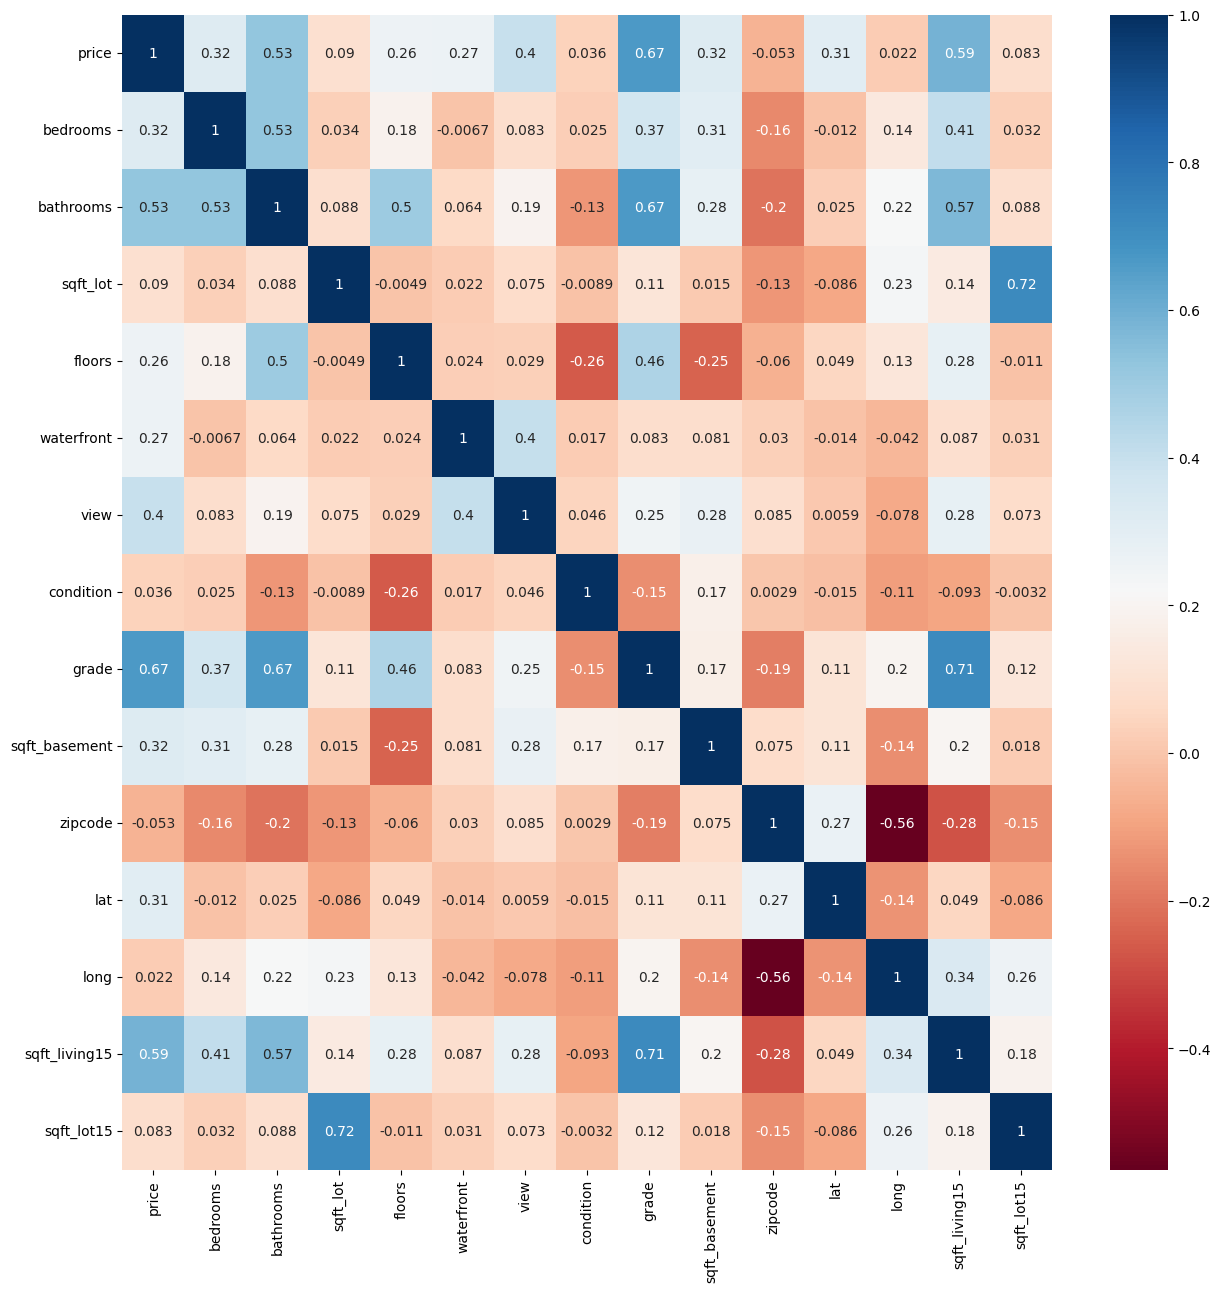

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',);

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X = df.drop(columns=['price'])

In [ ]:
X.to_

In [91]:
y = df['price']

In [93]:
# Assuming you have X and y arrays containing your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating Pipeline

In [100]:
scaler = ('scaler',StandardScaler())

models = []
models.append(('LR',Pipeline([scaler,('LinearRegression',LinearRegression())])))
models.append(('Ridge',Pipeline([scaler,('Ridge',Ridge())])))
models.append(('Lasso',Pipeline([scaler,('Lasso',Lasso())])))
models.append(('ElasticNet',Pipeline([scaler,('Elasticnet',ElasticNet())])))
models.append(('GRB',Pipeline([scaler,('Gradientboosting',GradientBoostingRegressor())])))
models.append(('ADABoost',Pipeline([scaler,('Adaboost',AdaBoostRegressor())])))
models.append(('ET',Pipeline([scaler,('ETR',ExtraTreesRegressor())])))
models.append(('RF',Pipeline([scaler,('RF',RandomForestRegressor())])))
models.append(('Baggign',Pipeline([scaler,('Bagging',BaggingRegressor())])))
models.append(('KNN',Pipeline([scaler,('KNN',KNeighborsRegressor())])))
models.append(('DT',Pipeline([scaler,('DT',DecisionTreeRegressor())])))
models.append(('XGB',Pipeline([scaler,('XGB',XGBRegressor())])))



              

In [101]:
models

[('LR',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('LinearRegression', LinearRegression())])),
 ('Ridge', Pipeline(steps=[('scaler', StandardScaler()), ('Ridge', Ridge())])),
 ('Lasso', Pipeline(steps=[('scaler', StandardScaler()), ('Lasso', Lasso())])),
 ('ElasticNet',
  Pipeline(steps=[('scaler', StandardScaler()), ('Elasticnet', ElasticNet())])),
 ('GRB',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('Gradientboosting', GradientBoostingRegressor())])),
 ('ADABoost',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('Adaboost', AdaBoostRegressor())])),
 ('ET',
  Pipeline(steps=[('scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])),
 ('RF',
  Pipeline(steps=[('scaler', StandardScaler()), ('RF', RandomForestRegressor())])),
 ('Baggign',
  Pipeline(steps=[('scaler', StandardScaler()), ('Bagging', BaggingRegressor())])),
 ('KNN',
  Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])),
 ('DT

# Cross Validation w/ using KFold

In [108]:
splits = 5
score = 'r2'
models_score = []

for i in models:
    kfold = KFold(n_splits=splits,random_state=0,shuffle=True)
    result = cross_val_score(i[1],X_train,y_train,cv=kfold,scoring=score)
    models_score.append({i[0]: '{} +/-{}'.format(result.mean(),result.std())})

In [109]:
models_score

[{'LR': '0.6316167275007606 +/-0.02264575225676166'},
 {'Ridge': '0.6316172207649672 +/-0.022647453034932655'},
 {'Lasso': '0.6316169358412784 +/-0.022646111167139493'},
 {'ElasticNet': '0.6045335583376439 +/-0.028308720072062307'},
 {'GRB': '0.8319195326272322 +/-0.009335609083181371'},
 {'ADABoost': '0.009065522708345198 +/-0.17922931388709518'},
 {'ET': '0.8469416972743972 +/-0.00790457283573097'},
 {'RF': '0.8458018042493596 +/-0.015721092424749564'},
 {'Baggign': '0.8179667955247997 +/-0.02453028150089249'},
 {'KNN': '0.7436709233020684 +/-0.01894377838550016'},
 {'DT': '0.6683879742333143 +/-0.060832999559458464'},
 {'XGB': '0.8418348048161592 +/-0.021912033222469304'}]

* XGBRegressor, RandomForestRegressor, ExtraTreeRegressor,GradientBoosting, and BaggingRegressor are the best

# Hyperparameter Tuning

### XGB 

In [134]:
scaler = StandardScaler()
model_2 = Pipeline([('scaler', scaler), ('XGB', XGBRegressor())])

models_2 = [('XGB', model_2)]

best = []
parameter = {
    'XGB': [
        {'XGB__learning_rate': [0.1],
         'XGB__max_depth': [4],
         'XGB__gamma':[0,0.1,2,4],
         'XGB__lambda':[0,0.1,0.5,1],
         'XGB__alpha':[0,0.1,0.5,1],
         'XGB__n_estimators': [1000]}
    ]
}

for i in models_2:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid=parameter[i[0]], cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_, grid.best_params_))


In [135]:
best

[('XGB',
  0.865630047634807,
  {'XGB__alpha': 0.5,
   'XGB__gamma': 0,
   'XGB__lambda': 0,
   'XGB__learning_rate': 0.1,
   'XGB__max_depth': 4,
   'XGB__n_estimators': 1000})]

In [137]:
xgb = XGBRegressor(learning_rate = 0.1, max_depth=4,n_estimators=1000,gamma=0,reg_lambda=0,alpha=0.5)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.880455849453915

### RandomForestRegressor

In [120]:
scaler = StandardScaler()
model_2 = Pipeline([('scaler', scaler), ('RandomForest', RandomForestRegressor())])

models_2 = [('RandomForest', model_2)]


parameter = {
    'RandomForest': [
        {'RandomForest__n_estimators': [100, 200, 500],
         'RandomForest__max_depth': [None, 5, 10],
         'RandomForest__min_samples_split': [2, 5, 10]}
    ]
}

for i in models_2:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid=parameter[i[0]], cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_, grid.best_params_))


In [121]:
best


[('XGB',
  0.8595179730242524,
  {'XGB__learning_rate': 0.1, 'XGB__max_depth': 4, 'XGB__n_estimators': 1000}),
 ('RandomForest',
  0.8458408070473086,
  {'RandomForest__max_depth': None,
   'RandomForest__min_samples_split': 2,
   'RandomForest__n_estimators': 500})]

In [122]:
rfr = RandomForestRegressor(max_depth=None,min_samples_split=2,n_estimators=500)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
rfr.score(X_test,y_test)

0.8728110210910879

### ExtraTreesRegressor

In [123]:
scaler = StandardScaler()
model_2 = Pipeline([('scaler', scaler), ('ExtraTrees', ExtraTreesRegressor())])

models_2 = [('ExtraTrees', model_2)]


parameter = {
    'ExtraTrees': [
        {'ExtraTrees__n_estimators': [100, 200, 500],
         'ExtraTrees__max_depth': [None, 5, 10],
         'ExtraTrees__min_samples_split': [2, 5, 10]}
    ]
}

for i in models_2:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid=parameter[i[0]], cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_, grid.best_params_))


In [124]:
best

[('XGB',
  0.8595179730242524,
  {'XGB__learning_rate': 0.1, 'XGB__max_depth': 4, 'XGB__n_estimators': 1000}),
 ('RandomForest',
  0.8458408070473086,
  {'RandomForest__max_depth': None,
   'RandomForest__min_samples_split': 2,
   'RandomForest__n_estimators': 500}),
 ('ExtraTrees',
  0.8483531134667629,
  {'ExtraTrees__max_depth': None,
   'ExtraTrees__min_samples_split': 5,
   'ExtraTrees__n_estimators': 200})]

In [125]:
etr = ExtraTreesRegressor(max_depth=None,min_samples_split=5,n_estimators=200)
etr.fit(X_train,y_train)
pred = etr.predict(X_test)
etr.score(X_test,y_test)

0.8678096065181609

### GradientBoosting

In [128]:
scaler = StandardScaler()
model_2 = Pipeline([('scaler', scaler), ('GradientBoosting', GradientBoostingRegressor())])

models_2 = [('GradientBoosting', model_2)]

parameter = {
    'GradientBoosting': [
        {'GradientBoosting__learning_rate': [0.1, 0.2, 0.3],
         'GradientBoosting__n_estimators': [100, 200, 500],
         'GradientBoosting__max_depth': [3, 5, None]}
    ]
}

for i in models_2:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid=parameter[i[0]], cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_, grid.best_params_))


In [129]:
best

[('XGB',
  0.8595179730242524,
  {'XGB__learning_rate': 0.1, 'XGB__max_depth': 4, 'XGB__n_estimators': 1000}),
 ('RandomForest',
  0.8458408070473086,
  {'RandomForest__max_depth': None,
   'RandomForest__min_samples_split': 2,
   'RandomForest__n_estimators': 500}),
 ('ExtraTrees',
  0.8483531134667629,
  {'ExtraTrees__max_depth': None,
   'ExtraTrees__min_samples_split': 5,
   'ExtraTrees__n_estimators': 200}),
 ('GradientBoosting',
  0.8563529877288172,
  {'GradientBoosting__learning_rate': 0.1,
   'GradientBoosting__max_depth': 5,
   'GradientBoosting__n_estimators': 500})]

In [131]:
gb = GradientBoostingRegressor(max_depth=5,learning_rate=0.1,n_estimators=500)
gb.fit(X_train,y_train)
pred = gb.predict(X_test)
gb.score(X_test,y_test)

0.8848230775715618

# Best Score is XGBoost : 0.880455849453915
# best parameters:
  {'XGB__alpha': 0.5,
   'XGB__gamma': 0,
   'XGB__lambda': 0,
   'XGB__learning_rate': 0.1,
   'XGB__max_depth': 4,
   'XGB__n_estimators': 1000})